In [1]:
import os
import gzip
from scipy import stats
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import networkx as nx
from sklearn.metrics import roc_curve, auc, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scienceplots
import requests
import pickle
import powerlaw
import gc
import seaborn as sns
from statannot import add_stat_annotation
import math
import random
import sys

from main_function import *
import main_function
from importlib import reload
reload(main_function)

<module 'main_function' from '/home/qinjiajie/jupyter_code/AUC_upload/main_function.py'>

# read index_set

In [2]:
file_path = './index_set/nodes_3000_3/%s.pkl' % 'ground_truth'
    
with open(file_path, 'rb') as f:
    ground_truth = pickle.load(f)

file_path = './index_set/nodes_3000_3/%s.pkl' % 'index'
    
with open(file_path, 'rb') as f:
    index = pickle.load(f)

file_path = './index_set/nodes_3000_3/%s.pkl' % 'index_error'
    
with open(file_path, 'rb') as f:
    index_error = pickle.load(f)

In [3]:
file_path = './index_set/nodes_3000_8/%s.pkl' % 'ground_truth'
    
with open(file_path, 'rb') as f:
    ground_truth_8 = pickle.load(f)

file_path = './index_set/nodes_3000_8/%s.pkl' % 'index'
    
with open(file_path, 'rb') as f:
    index_8 = pickle.load(f)

file_path = './index_set/nodes_3000_8/%s.pkl' % 'index_error'
    
with open(file_path, 'rb') as f:
    index_error_8 = pickle.load(f)

In [4]:
file_path = './index_set/nodes_3000_8_repeat_100/%s.pkl' % 'accuracy_degree'
    
with open(file_path, 'rb') as f:
    accuracy_degree = pickle.load(f)

In [5]:
gamma_hete = np.load('./index_set/hete_with_gamma/gamma_hete_3000_3.npz')
gamma_hete_8 = np.load('./index_set/hete_with_gamma/gamma_hete_3000_8.npz')

In [7]:
M=10
alpha=0.5
beta=0.3
q_1_1 = []
for z1 in np.arange(-M, M+1, 1):
    q_1_1.append(pz(z1, M, alpha, beta))
    
z = np.array(range(-M,M+1,1))
a = beta*(1-alpha)/(alpha*(1-beta))
az = a**z
q_baseline = sum(q_1_1[(M+1):]) + 0.5*q_1_1[M]

In [8]:
file_path = './index_set/empirical_network/%s.pkl' % 'ground_truth'
    
with open(file_path, 'rb') as f:
    ground_truth_empirical = pickle.load(f)

file_path = './index_set/empirical_network/%s.pkl' % 'index'
    
with open(file_path, 'rb') as f:
    index_empirical = pickle.load(f)

# Fig2

In [9]:
def zeta_delta_gamma(alpha,beta,ga,M,N,start,stop):
    from scipy.stats import norm
    kbar=3
    q_1_1_0 = pz(0, M, alpha, beta)
    zeta = []
    for delta_gamma in np.arange(start,stop,0.00025):
        temp = q_1_1_0*N*np.sqrt(kbar*N/2) * (delta_gamma/((2*ga-3)**2))
        zeta.append([delta_gamma,norm.cdf(temp)])
    
    return np.array(zeta)

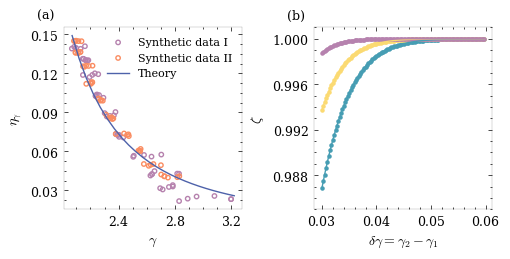

In [10]:
c = (183/256,131/256,175/256)
c1 = (251/256,141/256,97/256)
c2 = (145/256,166/256,115/256)
bwith = 0.1
fs=9
from matplotlib.ticker import MaxNLocator

with plt.style.context(['science', 'no-latex']):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.2, 2.7))
    k=0
    for ax in axs.flat:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.xaxis.set_major_locator(MaxNLocator(4))
        ax.spines['bottom'].set_linewidth(bwith)
        ax.spines['left'].set_linewidth(bwith)
        ax.spines['top'].set_linewidth(bwith)
        ax.spines['right'].set_linewidth(bwith)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.set_title('(%s)' % chr(97+k), x=-0.1, y=1,fontsize=fs)
        k=k+1
    ax = axs[0]
    
    for i in list(index.keys()):
        ax.scatter(estimate_gamma(ground_truth[i]),
                    (index[i][0].mean() - index[i][1].mean()), # 
                    marker='o',facecolors='none',edgecolors=c, s=10)
    ax.scatter(estimate_gamma(ground_truth[i]),
                (index[i][0].mean() - index[i][1].mean()), #
                marker='o',facecolors='none',edgecolors=c,label='Synthetic data I',s=10)

    
    for i in list(index_8.keys()):
        ax.scatter(estimate_gamma(ground_truth_8[i]), #
                    (index_8[i][0].mean()- index_8[i][1].mean()),
                    marker='o',facecolors='none',edgecolors=c1,s=10)  
    ax.scatter(estimate_gamma(ground_truth_8[i]),
                (index_8[i][0].mean() - index_8[i][1].mean()), # 
                marker='o',facecolors='none',edgecolors=c1,label='Synthetic data II',s=10)

    q_1000_7 = [1-sum(q_1_1*q_gamma(3000,ga,az)) for ga in np.arange(2.07,3.25,0.05)]
    ax.plot(np.arange(2.07,3.25,0.05),(q_1000_7 - q_baseline),label = 'Theory',c = (78/256,98/256,171/256))
    ax.set_xlabel(r'$\gamma$',fontsize=10)
    ax.set_ylabel(r'$\eta_{\gamma}$',fontsize=10)
    ax.legend(fontsize=fs-1)

    
    ax1 = axs[1]
    ga1=2.3
    zeta_gamma_temp  = zeta_delta_gamma(0.5,0.3,ga1,10,120,0.03,0.06)
    ax1.plot(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1], color=(70/256,158/256,180/256))
    ax1.scatter(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1], color=(70/256,158/256,180/256),s=5, label=r'$\alpha=0.5,\beta=0.3$')
    
    zeta_gamma_temp  = zeta_delta_gamma(0.5,0.33,ga1,10,120,0.03,0.06)
    ax1.plot(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(252/256,219/256,114/256))
    ax1.scatter(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(252/256,219/256,114/256),s=5, label=r'$\alpha=0.5,\beta=0.33$')
    
    zeta_gamma_temp  = zeta_delta_gamma(0.5,0.4,ga1,10,120,0.03,0.06)
    ax1.plot(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(183/256,131/256,175/256 ))
    ax1.scatter(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(183/256,131/256,175/256 ),s=5, label=r'$\alpha=0.5,\beta=0.4$')
    ax1.set_ylim([0.985,1.001])
    ax1.set_xlabel(r'$\delta \gamma = \gamma_2 - \gamma_1$',fontsize=10)
    ax1.set_ylabel(r'$\zeta$',fontsize=10)
    
plt.tight_layout()
plt.subplots_adjust(wspace =0.4, hspace =0.25)
# plt.savefig("./result_plot/Fig2.eps", format='eps',bbox_inches='tight',dpi=300,pad_inches=0.0)
plt.show()

# Fig3

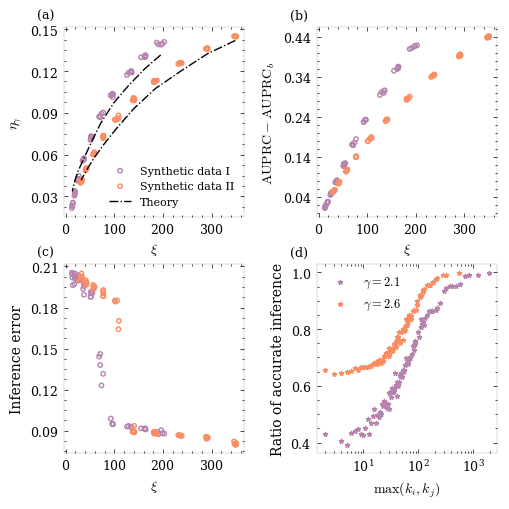

In [12]:
c = (183/256,131/256,175/256)
c1 = (251/256,141/256,97/256)
c2 = (145/256,166/256,115/256)
c_s = [np.array(c).reshape(1,-1),np.array(c1).reshape(1,-1),np.array(c2).reshape(1,-1)]
fs=9
bwith=0.1
with plt.style.context(['science', 'no-latex']):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5.2, 5.2))
    k=0
    for ax in axs.flat:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.xaxis.set_major_locator(MaxNLocator(4))
        ax.spines['bottom'].set_linewidth(bwith)
        ax.spines['left'].set_linewidth(bwith)
        ax.spines['top'].set_linewidth(bwith)
        ax.spines['right'].set_linewidth(bwith)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.set_title('(%s)' % chr(97+k), x=-0.1, y=1,fontsize=fs)
        k=k+1

    
    ax = axs[0,0]
    for i in list(index.keys()):
        ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][0].mean() - index[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)
    ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][0].mean() - index[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,label='Synthetic data I',s=10)

    q_2 = [1-sum(q_1_1*q_gamma(3000,ga,az)) for ga in sorted(gamma_hete['arr_0'])]
    ax.plot(sorted(gamma_hete['arr_1'],reverse=True),(q_2 - q_baseline),c='k',linestyle='-.')
    
        
    for i in list(index_8.keys()):
        
        ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][0].mean() - index_8[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,s=10)
    ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][0].mean() - index_8[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,label='Synthetic data II',s=10)
    q_2 = [1-sum(q_1_1*q_gamma(3000,ga,az)) for ga in sorted(gamma_hete_8['arr_0'])]
    ax.plot(sorted(gamma_hete_8['arr_1'],reverse=True),(q_2 - q_baseline),c='k',label='Theory',linestyle='-.')
    
    ax.set_xlabel(r'$\xi$',fontsize=10)
    ax.set_ylabel(r'$\eta_{\gamma}$',fontsize=10)
    ax.legend(fontsize=fs-1)

    ax = axs[0,1]
    for i in list(index.keys()):
        
        ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][2].mean() - index[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)
    ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][2].mean() - index[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)

    ax.set_xlabel(r'$\xi$',fontsize=10)
    ax.set_ylabel(r'$\text{AUPRC} - \text{AUPRC}_{b}$')
    ax.set_yticks([0.04, 0.14, 0.24, 0.34,0.44])
        
    for i in list(index_8.keys()):
        
        ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][2].mean() - index_8[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,s=10)
    ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][2].mean() - index_8[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,label='simulation2',s=10)

    ax = axs[1,0]
    for i in list(index_error.keys()):
        ax.scatter(degree_heterogeneity(ground_truth[i]),
                    index_error[i][0].mean(),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)
    for i in list(index_error_8.keys()):
        ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    index_error_8[i][0].mean(),
                    marker='o',facecolors='none',
                    edgecolors=c1,s=10)
    
    ax.set_xlabel(r'$\xi$',fontsize=10)
    ax.set_ylabel('Inference error')
    
    
    ax = axs[1,1]
    k=0
    e_g = estimate_gamma(ground_truth_8['0'])
    e_g = [e_g[0],e_g[4]]
    for i in list(accuracy_degree.keys()):
        zz1 = accuracy_degree[i]
        df = pd.DataFrame({'x': zz1[5][zz1[4]==1], 'y': zz1[6][zz1[4]==1]})
        mean_accuracy = df.groupby('x')['y'].mean().reset_index()
        ax.scatter(mean_accuracy.x,mean_accuracy.y/100,
                    marker='*',c=c_s[k],s=10, label=r'$\gamma=%s$' % round(e_g[k],1))
        k = k+1
    ax.set_yticks([0.4, 0.6, 0.8,  1])
    ax.set_xscale('log')
    ax.set_xlabel(r'$\max{(k_i,k_j)}$',fontsize=10)
    ax.set_ylabel('Ratio of accurate inference')
    ax.legend(fontsize=fs)
 
plt.tight_layout()
plt.subplots_adjust(wspace =0.4, hspace =0.25)
# plt.savefig("./result_plot/Fig3.eps", format='eps',bbox_inches='tight',dpi=300,pad_inches=0.0)
plt.show()

# Fig4

In [13]:
hete = []
for i in list(index_empirical.keys()):
    hete = hete + degree_heterogeneity(ground_truth_empirical[i])

selected_index = [1,31, 23, 18, 8]
col_name = list(np.round(np.array([hete[i] for i in selected_index]),2))

AUC_reality_scale = index_empirical['real_1008'][0].iloc[:, selected_index]
AUC_reality_baseline = index_empirical['real_1008'][1].iloc[:, selected_index]
AUC_reality_scale.columns = col_name
AUC_reality_baseline.columns = col_name

In [14]:
df_melt1 = pd.melt(AUC_reality_baseline, value_vars=AUC_reality_baseline.columns)
df_melt1['type'] = 'Baseline'
df_melt1.columns = ['group','AUC','type']

df_melt2 = pd.melt(AUC_reality_scale, value_vars=AUC_reality_scale.columns)
df_melt2['type'] = 'Empirical Network'
df_melt2.columns = ['group','AUC','type']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

19.37_Empirical Network v.s. 19.37_Baseline: t-test independent samples with Bonferroni correction, P_val=1.449e-39 stat=4.359e+01
8.75_Empirical Network v.s. 8.75_Baseline: t-test independent samples with Bonferroni correction, P_val=5.537e-24 stat=1.974e+01
27.28_Empirical Network v.s. 27.28_Baseline: t-test independent samples with Bonferroni correction, P_val=1.781e-43 stat=5.279e+01
32.34_Empirical Network v.s. 32.34_Baseline: t-test independent samples with Bonferroni correction, P_val=2.917e-45 stat=5.759e+01
55.08_Empirical Network v.s. 55.08_Baseline: t-test independent samples with Bonferroni correction, P_val=1.205e-57 stat=1.048e+02


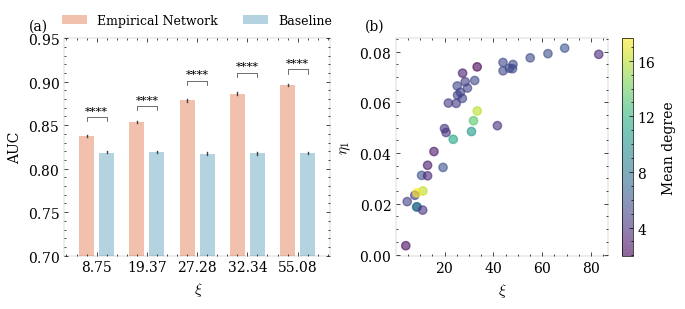

In [15]:
fs = 10
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
with plt.style.context(['science', 'no-latex']):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.2))
    k=0
    for ax in axs:
        ax.spines['bottom'].set_linewidth(bwith)
        ax.spines['left'].set_linewidth(bwith)
        ax.spines['top'].set_linewidth(bwith)
        ax.spines['right'].set_linewidth(bwith)
        ax.xaxis.label.set_size(fs)
        ax.yaxis.label.set_size(fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.yaxis.set_major_locator(MaxNLocator(5))
        ax.set_title('(%s)' % chr(97+k), x=-0.1, y=1,fontsize=fs)
        k=k+1

    ax = axs[0]
    df = pd.concat([df_melt2, df_melt1])
    
    x = "group"
    y = "AUC"
    hue = "type"
    box_pairs = [((clar, df_melt2['type'][0]), (clar, df_melt1['type'][0])) for clar in df['group'].unique()]

    ax = sns.barplot(data=df, x=x, y=y, hue=hue, dodge=1,errwidth=1,
                palette={df_melt1['type'][0]: (173/256,215/256,233/256), df_melt2['type'][0]: (255/256,189/256,162/256)},
                ax=ax)
    widthbars = 0.3*np.ones(10)
    add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                        box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2, 
                        line_offset_to_box=0.01,  line_height=0.005, linewidth=0.5,fontsize='small')
    # ax.axes.xaxis.set_visible(False)
    for bar,newwidth in zip(ax.patches,widthbars):
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width/2.
        bar.set_x(centre-newwidth/2.)
        bar.set_width(newwidth)
    ax.set_xlabel(r' $\xi$',fontsize=fs+1)
    ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, 1), fontsize=9)
    ax.set_ylim([0.7,0.95])
    
    ax = axs[1]
    md = []
    hete = []
    y = []
    
    for i in list(index_empirical.keys()):
        hete = hete + degree_heterogeneity(ground_truth_empirical[i])
        y = y + list(index_empirical[i][0].mean() - index_empirical[i][1].mean())
        md = md + list(read_mean_degree(ground_truth_empirical[i]))
    sc = ax.scatter(np.array(hete),np.array(y),
                marker='o',c=np.array(md),
                cmap='viridis',alpha=0.6)
    cb = plt.colorbar(sc,ax=ax)
    cb.locator = ticker.MaxNLocator(nbins=4)
    cb.ax.tick_params(labelsize=fs)
    cb.set_label('Mean degree',fontsize=fs)
    ax.set_xlabel(r'$\xi$',fontsize=fs+1)
    ax.set_ylabel(r'$\eta_1$',fontsize=fs+1)

plt.tight_layout()
plt.subplots_adjust(wspace =0.25, hspace =0.25)
# plt.savefig("empirical_data.eps", format='eps', bbox_inches='tight',dpi=300,pad_inches=0.0)
plt.show()